<a href="https://colab.research.google.com/github/nihal3000/AIML2023/blob/main/Copy_of_AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [17]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [18]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [19]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

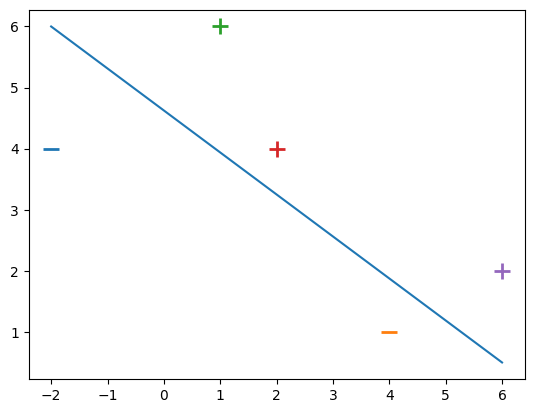

In [20]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

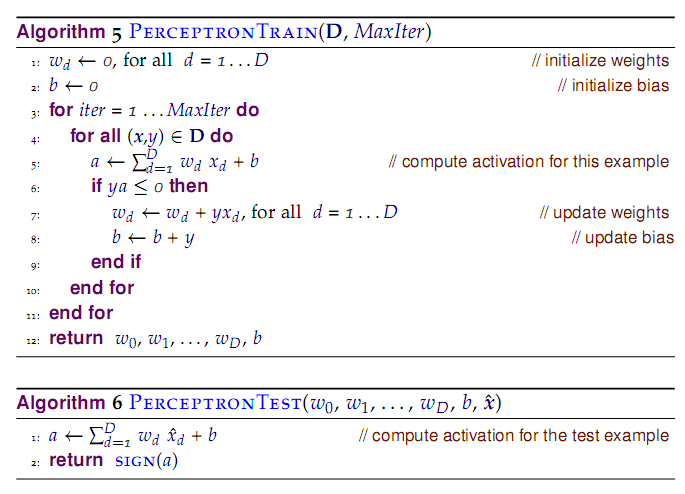

The algorithm is shown in the above image.

In [21]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [22]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

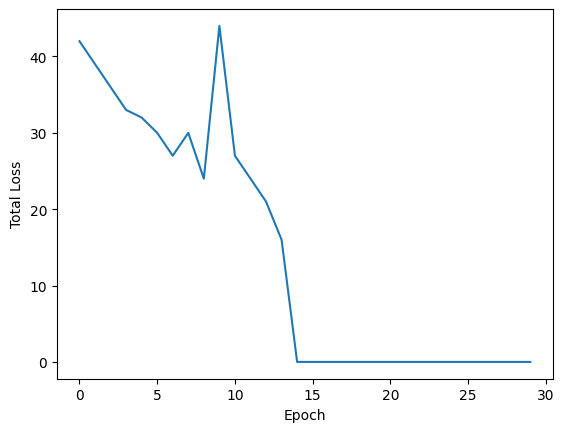

In [23]:
w = perceptron_algo_plot(X, y)

In [24]:
print(w)

[ 2.  3. 13.]


We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

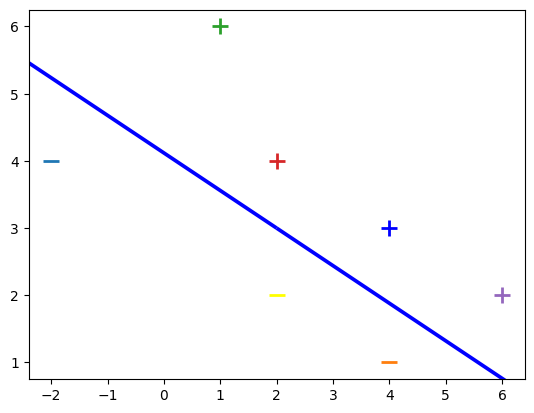

In [25]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [26]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [27]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


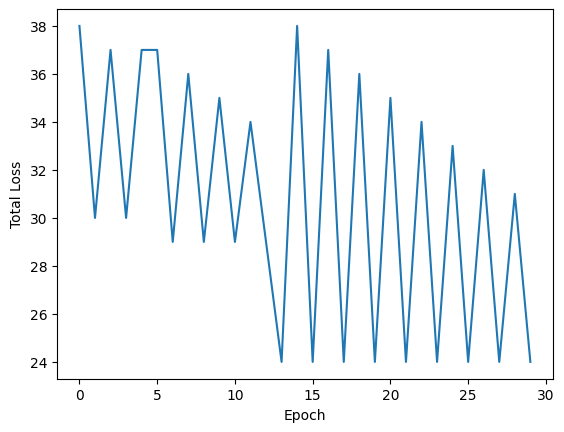

In [28]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

# Perceptron algorithm on house price dataset

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
house_data = pd.read_csv("/content/Housing.csv")
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [32]:
house_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [33]:
house_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [34]:
s = (house_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [35]:
from sklearn.preprocessing import OrdinalEncoder #Converting categorial values into numerical values

In [36]:
X = house_data.copy()
encoder = OrdinalEncoder()
X[object_cols] = encoder.fit_transform(house_data[object_cols])

In [37]:
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


In [38]:
X_new = X.astype(int)
X_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [39]:
X_data = X_new.drop(columns='price')
X_data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [40]:
threshold_price = 3000000  # Define a threshold
X_new['price_class'] = np.where(X_new['price'] > threshold_price, 1, -1)

In [41]:
X_new.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_class
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,-1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,-1
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2,-1


In [42]:
X_new['price_class'].values

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [43]:
X_data = X_new.drop(columns = ['price','price_class']).values
Y_data = X_new['price_class'].values

In [80]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.002
    n = 40
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w, errors

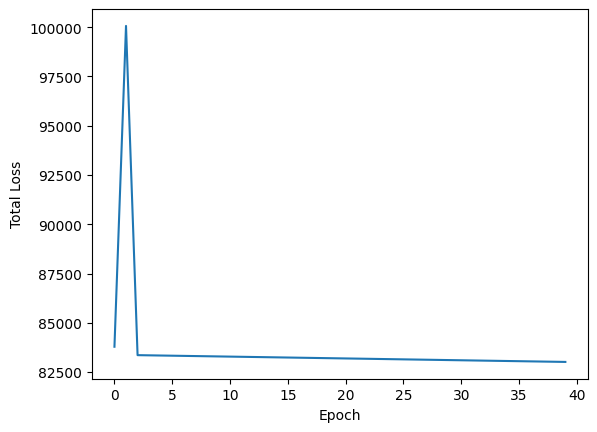

In [81]:
# ERROR PLOT
w, errors = perceptron_algo_plot(X_data, Y_data)

 Above is the Error plot for the dataset(House Price) I utilized using different learning rate that is 0.002 and it converges by taking roughly **less than 40 epochs**

In [46]:
print(w[0])

-0.16200000000000425


In [47]:
print(len(errors))

30


# Splitting the dataset for training and testing just for observing the  error plot for the trained data

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data, test_size=0.15, random_state=0)

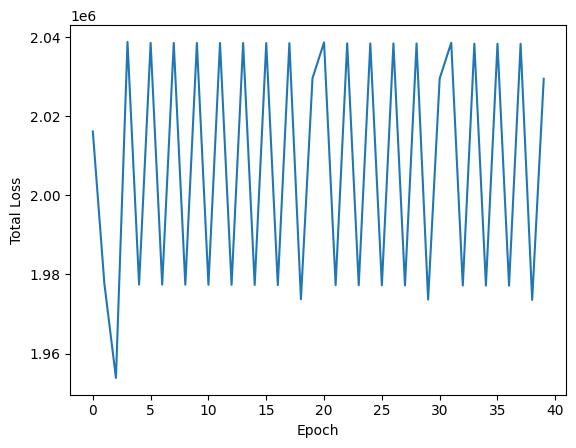

In [75]:
w3, error3 = perceptron_algo_plot(x_train,y_train)

According to the observation we can see that the training data is repeating the same weights thus the perceptron Algorithm enters into an infinite loop

One of the reason could be the involvement of randomness while splitting the dataset into train and test which causes variations in the model

# Using make_circle dataset which is not linearly seperable for identifying the error plot

In [51]:
from sklearn.datasets import make_circles
circle = make_circles()
circle

(array([[ 4.28661436e-01,  6.75462340e-01],
        [-7.28968627e-01,  6.84547106e-01],
        [-8.09016994e-01,  5.87785252e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 6.37423990e-01,  7.70513243e-01],
        [ 6.27905195e-02,  9.98026728e-01],
        [ 3.09016994e-01, -9.51056516e-01],
        [ 8.76306680e-01, -4.81753674e-01],
        [ 8.00000000e-01,  0.00000000e+00],
        [ 5.35826795e-01,  8.44327926e-01],
        [-5.83174902e-01, -5.47637685e-01],
        [ 4.28661436e-01, -6.75462340e-01],
        [ 7.93691761e-01,  1.00266587e-01],
        [-6.47213595e-01, -4.70228202e-01],
        [-9.92114701e-01, -1.25333234e-01],
        [ 3.40623433e-01,  7.23861642e-01],
        [-8.76306680e-01, -4.81753674e-01],
        [ 7.28968627e-01, -6.84547106e-01],
        [-3.09016994e-01, -9.51056516e-01],
        [-5.83174902e-01,  5.47637685e-01],
        [-1.00000000e+00, -3.21624530e-16],
        [-2.47213595e-01, -7.60845213e-01],
        [ 4.25779292e-01,  9.048

In [52]:
X, Y = make_circles(n_samples = 500, noise = 0.2)

In [53]:
print(X)

[[ 1.58829247e-01  1.07175573e+00]
 [-3.26732859e-01 -1.04818559e+00]
 [-2.57795005e-01  9.95536427e-01]
 [-7.14577152e-01  1.23274090e+00]
 [-8.29524491e-02 -7.52532368e-01]
 [ 7.99293135e-01  5.03857346e-01]
 [-1.09852205e+00 -1.63956206e-01]
 [-1.01758789e+00 -5.24603325e-01]
 [ 1.17990970e-01 -8.57718002e-01]
 [ 6.87499415e-01 -4.85479575e-02]
 [ 7.08237756e-01 -1.11638995e+00]
 [-8.32328532e-01  3.16484378e-01]
 [-5.38849881e-01  9.30406462e-01]
 [ 5.25557448e-01 -1.02918083e+00]
 [-7.18837405e-01 -5.15268411e-01]
 [-4.96147627e-01 -7.52327106e-01]
 [ 4.33095909e-01  5.20886134e-01]
 [ 8.76881614e-01  8.46287044e-01]
 [-4.75938493e-01 -1.91698523e-01]
 [-8.54773495e-01  3.52670397e-01]
 [ 1.05724863e+00  5.00750064e-01]
 [ 3.01509289e-01  9.11992797e-01]
 [-3.38057997e-01  2.71051017e-01]
 [-2.52287419e-01 -1.01125851e+00]
 [ 2.29303967e-01 -9.74843267e-01]
 [ 5.88296044e-01  3.02278567e-02]
 [ 7.05890809e-01 -1.01441556e+00]
 [-9.04009736e-01  5.85629178e-01]
 [ 9.57008345e-01  9

In [54]:
print(Y)

[1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1
 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0
 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 1 0 

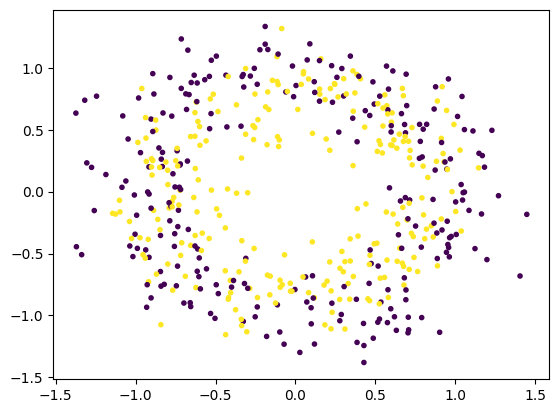

In [55]:
plt.scatter(X[:,0],X[:,1],c=Y,marker='.')

In [56]:
x_data = pd.DataFrame(X, columns=['x1','x2'])
x_data.head()

,x1,x2
0,0.158829,1.071756
1,-0.326733,-1.048186
2,-0.257795,0.995536
3,-0.714577,1.232741
4,-0.082952,-0.752532


In [57]:
x_data = x_data.values

In [76]:
def perceptron_algo_plot_2(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.7
    n = 50
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w, errors

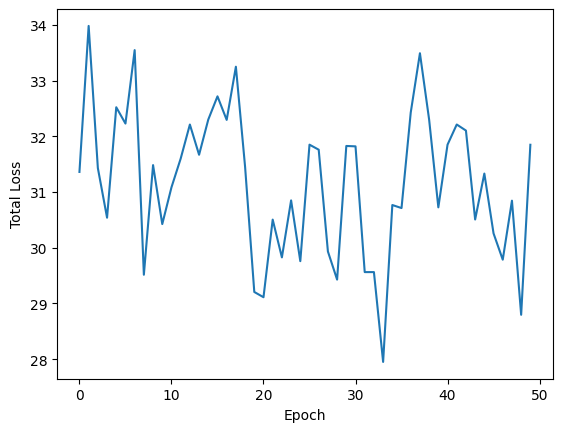

In [77]:
w2, errors2 = perceptron_algo_plot_2(x_data,Y)

Above is the error plot for Make circle dataset

In [60]:
print(errors2)

[31.362276516734415, 33.98444957044238, 31.43208357238308, 30.540207692904534, 32.523791472968576, 32.23075566640724, 33.54998959534753, 29.515544108519556, 31.484676691368872, 30.42544237651612, 31.08589733734372, 31.601066949562416, 32.213328816275045, 31.670419502852862, 32.30273367975075, 32.71963089367997, 32.29681606118637, 33.25177103059241, 31.454556092112718, 29.206346898745878, 29.111869298060466, 30.50614156912789, 29.82708770303073, 30.850813988355778, 29.759688872224864, 31.851868646449425, 31.761434956483274, 29.933544597044236, 29.428090540762405, 31.828381191871472]
